In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Optional: move to the desired location:
#%cd drive/My Drive/DIRECTORY_IN_YOUR_DRIVE

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
#sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
import tensorflow as tf
#Convert the text into numeric values.
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras  
from sklearn.svm import SVC
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay

import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
#first import KNeighborsClassifier Algorithm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data_folder = 'drive/My Drive/Omdena/SriLanka/Autism/data'
csv_files = os.listdir(data_folder)
print(csv_files)


['Autism Spectrum Disorder Screening Data for Toddlers in Saudi Arabia Data Set.csv', 'Autism-Child-Data.csv', 'data_csv.csv', 'Toddler Autism dataset July 2018.csv']


# Saudi Data

## Data Processing

In [ ]:
saudi_df = pd.read_csv(os.path.join(data_folder,'Autism Spectrum Disorder Screening Data for Toddlers in Saudi Arabia Data Set.csv'))


convert categorical string data to numeric data through label encoding

In [ ]:
le_Species = LabelEncoder()
saudi_df['Family member with ASD history'] = le_Species.fit_transform(saudi_df['Family member with ASD history'])
saudi_df['Gender'] = le_Species.fit_transform(saudi_df['Gender'])
saudi_df['Region'] = le_Species.fit_transform(saudi_df['Region'])

In [ ]:
#select target and predectors
X = saudi_df.drop (["Who is completing the test","Screening Score","Class"],axis = 1)
y = saudi_df["Class"].values 
print(X.shape)

(506, 14)


We keep 20% of the data as test data

In [ ]:
#Split the dataset 
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state =0)

## Training

### SVM

In [ ]:
svm=SVC(random_state=0)
#train model using train set x,y
svm.fit(X_train ,y_train)
#Printing accuracy scores of training and testing data
print("train accuracy:",svm.score(X_train,y_train))
#print("test accuracy:",svm.score(X_test,y_test))
svm_preds =  svm.predict(X_test)
#print(svm_preds)
svm_accuracy =  accuracy_score(y_test, svm_preds)
svm_cf = confusion_matrix(y_test, svm_preds, labels=svm.classes_)
svm_classification_report = classification_report(y_test, svm_preds)

train accuracy: 0.75


In [ ]:
print(f'test acc: {svm_accuracy}')

test acc: 0.6764705882352942


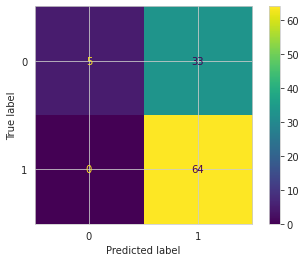

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cf, display_labels=svm.classes_)
disp.plot()
plt.show()

In [ ]:
print(svm_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.13      0.23        38
           1       0.66      1.00      0.80        64

    accuracy                           0.68       102
   macro avg       0.83      0.57      0.51       102
weighted avg       0.79      0.68      0.59       102



The model performs poorly with very low f1 score and accuracy. 

### SVM: Optimize Feature Selection

Previously, we've seen taking all features causes accuracy to drop. So, we experiment by taking particular features and observe the train/test accuracies.

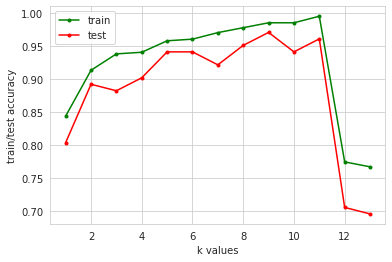

In [ ]:
accuracy_list_train = [] #save the train accuracy for every set of features chosen
accuracy_list_test = [] #save the test accuracy for every set of features chosen
k=np.arange(1,14,1) #there are 14 features
for each in k:
    selector = SelectKBest(f_classif, k=each)
    X_new = selector.fit_transform(X_train, y_train) #Choose the best k features 
    X_new_test = selector.fit_transform(X_test, y_test) 
    svm.fit(X_new,y_train) #Fit SVM model based on the chosen features 
    accuracy_list_train.append(svm.score(X_new,y_train))   #determine train accuracy for that set of k features and save the accuracies for later analysis
    accuracy_list_test.append(svm.score(X_new_test,y_test))   #determine train accuracy for that set of k features and save the accuracies for later analysis  
    
plt.plot(k,accuracy_list_train,color="green",label="train", marker = '.')
plt.plot(k,accuracy_list_test,color="red",label="test", marker = '.')
plt.xlabel("k values")
plt.ylabel("train/test accuracy")
plt.legend()
plt.show()

In [ ]:
d = {'best features number': k, 'train_score': accuracy_list_train}
feature_acc_train_df = pd.DataFrame(data=d)
d = {'best features number': k, 'test_score': accuracy_list_test}
feature_acc_test_df = pd.DataFrame(data=d)

print('From the training data: ')
print(feature_acc_train_df.loc[feature_acc_train_df["train_score"].idxmax()])

print('From the testing data: ')
print(feature_acc_test_df.loc[feature_acc_test_df["test_score"].idxmax()])

From the training data: 
best features number    11.00000
train_score              0.99505
Name: 10, dtype: float64
From the testing data: 
best features number    9.000000
test_score              0.970588
Name: 8, dtype: float64


From observing the accuracy vs feature graph and maximum train/test accuracies , we can opine choosing above 10 features causes overfitting.

In [ ]:
number_of_features = 11
selector = SelectKBest(f_classif, k =number_of_features) #index 10 = 0.995050 highest train score
X_new = selector.fit_transform(X_train, y_train)
X_new_test=selector.fit_transform(X_test,y_test)
names_train = X_train.columns.values[selector.get_support()]
names_test = X_test.columns.values[selector.get_support()]
print(f'Top {number_of_features} features' )
print("x train features:",names_train)
print("x test features:",names_test)
print()

number_of_features = 10
selector = SelectKBest(f_classif, k =number_of_features) #index 10 = 0.995050 highest train score
X_new = selector.fit_transform(X_train, y_train)
X_new_test=selector.fit_transform(X_test,y_test)
names_train = X_train.columns.values[selector.get_support()]
names_test = X_test.columns.values[selector.get_support()]
print(f'Top {number_of_features} features' )
print("x train features:",names_train)
print("x test features:",names_test)

Top 11 features
x train features: ['A10' 'A9' 'A8' 'A7' 'A6' 'A5' 'A4' 'A3' 'A2' 'A1'
 'Family member with ASD history']
x test features: ['A10' 'A9' 'A8' 'A7' 'A6' 'A5' 'A4' 'A3' 'A2' 'A1'
 'Family member with ASD history']

Top 10 features
x train features: ['A10' 'A9' 'A8' 'A7' 'A6' 'A5' 'A4' 'A3' 'A2' 'A1']
x test features: ['A10' 'A9' 'A8' 'A7' 'A6' 'A5' 'A4' 'A3' 'A2' 'A1']


So, the top 10 features are A1 to A10. The 11th important feature is family ASD history. In my previous [EDA notebook](https://www.kaggle.com/code/mdruksharalam/saudi-asd-toddlers-eda), I mentioned how family history may have some relation with ASD. However, picking above the 10 most important features may cause unnecessary overfitting and so we'll limit our experiments with 10 features.

In [ ]:
svm=SVC(random_state=0)
svm.fit(X_new ,y_train)
print("train accuracy:",svm.score(X_new,y_train))
print("test accuracy:",svm.score(X_new_test,y_test))

train accuracy: 0.9851485148514851
test accuracy: 0.9411764705882353


In [ ]:
svm_preds =  svm.predict(X_new_test)
#print(svm_preds)
svm_accuracy =  accuracy_score(y_test, svm_preds)
svm_cf = confusion_matrix(y_test, svm_preds, labels=svm.classes_)
svm_classification_report = classification_report(y_test, svm_preds)

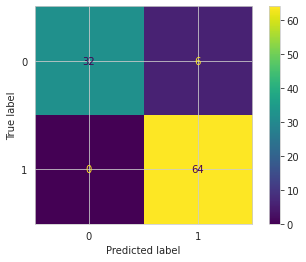

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cf, display_labels=svm.classes_)
disp.plot()
plt.show()

In [ ]:
print(svm_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        38
           1       0.91      1.00      0.96        64

    accuracy                           0.94       102
   macro avg       0.96      0.92      0.93       102
weighted avg       0.95      0.94      0.94       102



This is an improved model after the feature selected(A1-A10) as opposed to the previous model that took all the features and caused overfitting. However, Since the dataset is imbalanced (70% is ASD positive) there are some misclassification for some non ASD cases that brought down the f1 score.

### Linear Regression

In [ ]:
number_of_features = 10
selector = SelectKBest(f_classif, k =number_of_features) #index 10 = 0.995050 highest train score
X_new = selector.fit_transform(X_train, y_train)
X_new_test=selector.fit_transform(X_test,y_test)
names_train = X_train.columns.values[selector.get_support()]
names_test = X_test.columns.values[selector.get_support()]
print(f'Top {number_of_features} features' )
print("x train features:",names_train)
print("x test features:",names_test)

Top 10 features
x train features: ['A10' 'A9' 'A8' 'A7' 'A6' 'A5' 'A4' 'A3' 'A2' 'A1']
x test features: ['A10' 'A9' 'A8' 'A7' 'A6' 'A5' 'A4' 'A3' 'A2' 'A1']


In [ ]:
lgrmodel= LogisticRegression()

#fit the model
lgrmodel.fit(X_new , y_train)
print("train accuracy:",lgrmodel.score(X_new,y_train)) #we use the 10 chosen features 
#print("test accuracy:",lgrmodel.score(X_new_test,y_test))

train accuracy: 0.9777227722772277


In [ ]:
lr_preds =  lgrmodel.predict(X_new_test)
#print(svm_preds)
lr_accuracy =  accuracy_score(y_test, lr_preds)
lr_cm = confusion_matrix(y_test, lr_preds, labels=lgrmodel.classes_)
lr_classification_report = classification_report(y_test, lr_preds)

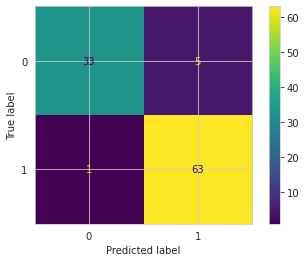

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=lgrmodel.classes_)
disp.plot()
plt.show()

In [ ]:
print(lr_classification_report)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.93      0.98      0.95        64

    accuracy                           0.94       102
   macro avg       0.95      0.93      0.94       102
weighted avg       0.94      0.94      0.94       102



Judging by the classification reports from LR and SVM, the performance is quite similar given a total of 6 datapoints are misclassified in both the cases. However, LR misclassifies 1 positive ASD case

### KNN

At first, we do a rudimentary experiment with 10 neighbors with the previously chosen 10 features

In [ ]:
knn = KNeighborsClassifier(n_neighbors =10 , weights = 'distance')
knn.fit(X_new, y_train)

#Printing accuracy scores of training and testing data
print("train accuracy:", knn.score(X_new,y_train))


train accuracy: 0.9925742574257426


              precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.94      0.94      0.94        64

    accuracy                           0.92       102
   macro avg       0.92      0.92      0.92       102
weighted avg       0.92      0.92      0.92       102



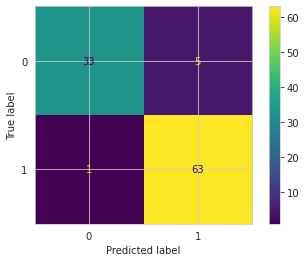

In [ ]:
knn_preds =  knn.predict(X_new_test)
#print(svm_preds)
knn_accuracy =  accuracy_score(y_test, knn_preds)
knn_cm = confusion_matrix(y_test, knn_preds, labels=knn.classes_)
knn_classification_report = classification_report(y_test, knn_preds)
print(knn_classification_report)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn.classes_)
disp.plot()
plt.show()

Given the high difference between train(.99) and test(.92) accuracy, this model is quite overfitted.

### KNN: Optimized

Now we attempt to optimize the k hyperparameter to increase the accuracy.

Minimum error:- 0.0196078431372549 at K = 3


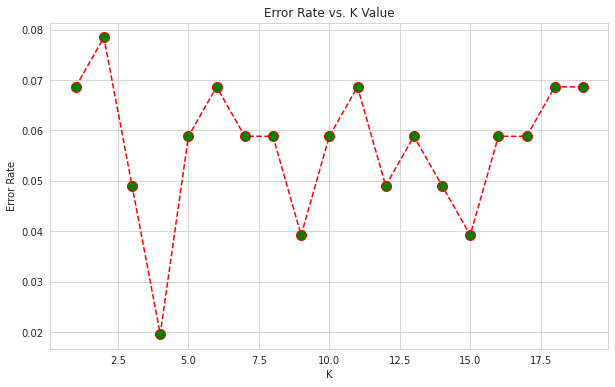

In [ ]:
#Use an error plot to find the best K value
error_rate = []
for i in range(1,20):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_new,y_train)
 pred_i = knn.predict(X_new_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Since the min. error occurs for k =3, we choose k=3 for our KNN algo.

In [ ]:
#retrain 
knn = KNeighborsClassifier(n_neighbors = 3 , weights = 'distance')
knn.fit(X_new, y_train)

#Printing accuracy scores of training and testing data
print("train accuracy:", knn.score(X_new,y_train))
print("test accuracy:", knn.score(X_new_test,y_test))

train accuracy: 0.9925742574257426
test accuracy: 0.9509803921568627


              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.95      0.97      0.96        64

    accuracy                           0.95       102
   macro avg       0.95      0.94      0.95       102
weighted avg       0.95      0.95      0.95       102



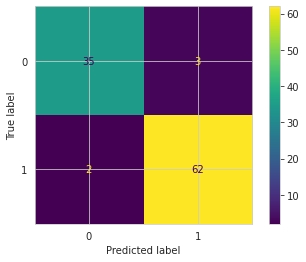

In [ ]:
knn_preds =  knn.predict(X_new_test)
#print(svm_preds)
knn_accuracy =  accuracy_score(y_test, knn_preds)
knn_cm = confusion_matrix(y_test, knn_preds, labels=knn.classes_)
knn_classification_report = classification_report(y_test, knn_preds)
print(knn_classification_report)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn.classes_)
disp.plot()
plt.show()

After optimization of K hyperparameter and choosing k=3, the test accuracy has increased from 0.92 to 0.95